In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def ImageShow(image, color_map=None):
    plt.imshow(image, cmap=color_map)
    pass

In [3]:
image = cv2.imread("/home/vitalii/source/computer_vision/lenna.png", 0)  # Download one channel image
image.shape

(512, 512)

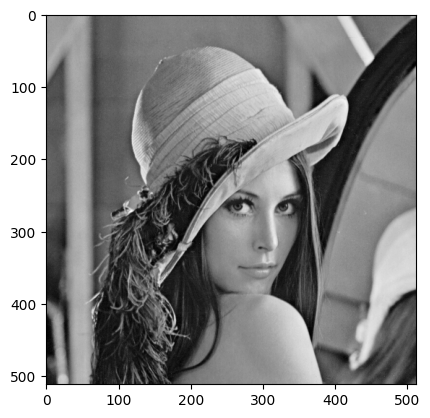

In [4]:
ImageShow(image, "grey")

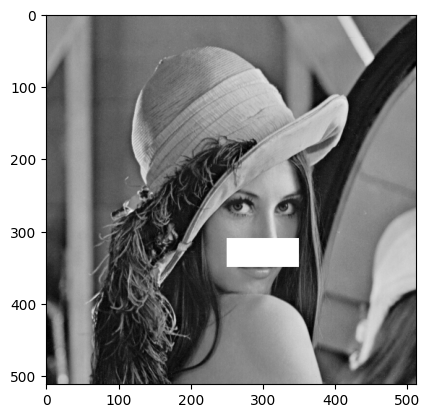

In [5]:
image[310:350, 250:350] = 255
ImageShow(image, "grey")

In [6]:
cv2.line(image, (0, 0), (100, 100), (255, 255, 255), 1)
cv2.putText(image, "Lenna", (100, 100), 1, 1, (255, 255, 255))

array([[255, 169, 168, ..., 175, 162, 138],
       [169, 255, 168, ..., 175, 162, 138],
       [169, 169, 255, ..., 175, 162, 138],
       ...,
       [ 53,  53,  59, ..., 115, 112, 114],
       [ 53,  53,  64, ..., 117, 118, 122],
       [ 53,  53,  64, ..., 117, 118, 122]], dtype=uint8)

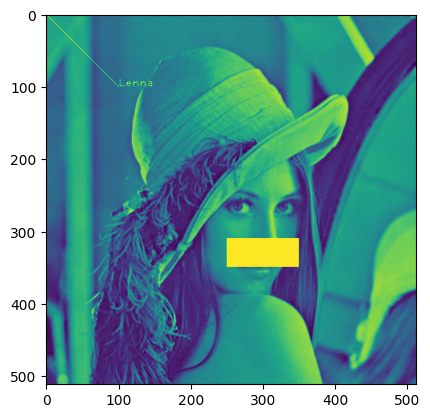

In [7]:
ImageShow(image)

# Filters

### Bilateral

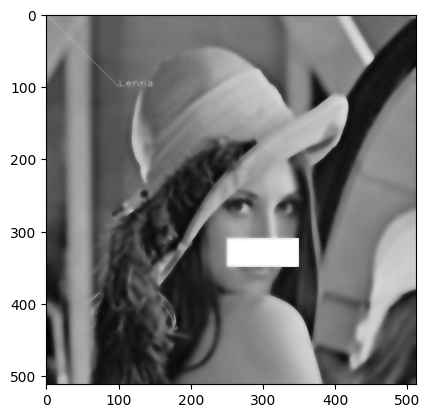

In [8]:
plt.imshow(cv2.bilateralFilter(image, 10, 75, 75), cmap="grey")

### Filter2D

##### Blur

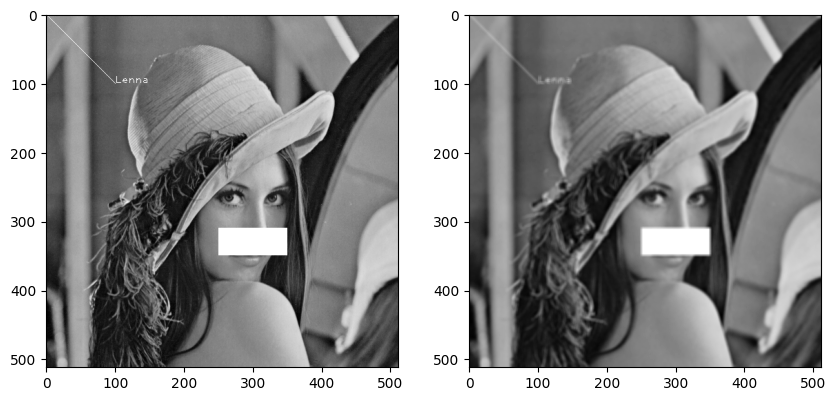

In [9]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.imshow(image, "grey")

blur_kernel = np.ones((5, 5), np.float32)/30
ax2.imshow(cv2.filter2D(image, ddepth=-1, kernel=blur_kernel), cmap="gray")
pass

##### Edge detect

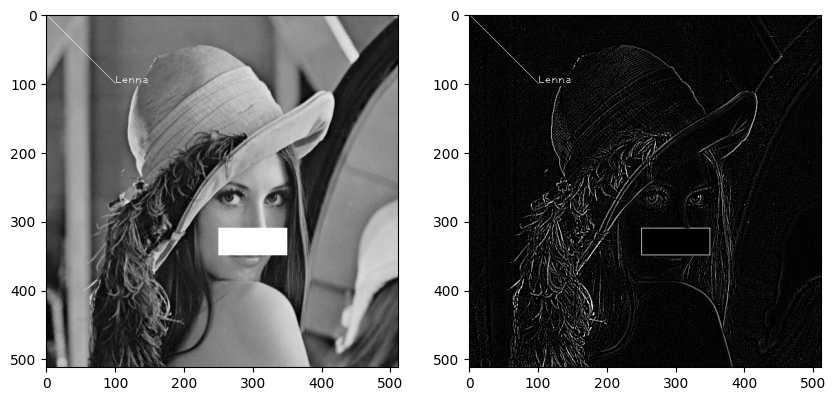

In [10]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.imshow(image, "grey")

edge_detect_kernel = np.array([[-1, -1, -1], 
                               [-1, 8, -1], 
                               [-1, -1, -1]]) 
ax2.imshow(cv2.filter2D(image, ddepth=-1, kernel=edge_detect_kernel), cmap="gray")
pass

### HSV

##### Situration

In [11]:
image = cv2.imread("/home/vitalii/source/computer_vision/lenna.png")
cv2.imshow('Original', image)  
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image[200:300, :, 1] = image[200:300, :, 1] * 1.15
image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
cv2.imshow('Some', cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

cv2.waitKey(0) 
cv2.destroyAllWindows() 

### Equalize hist (Повышение контраста)

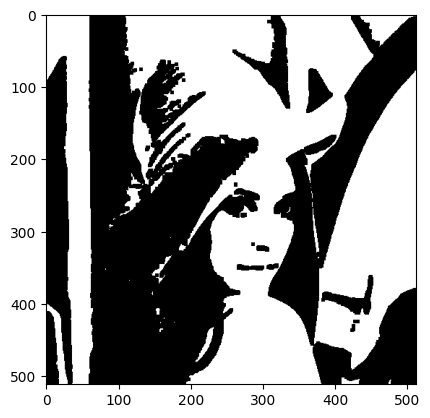

In [33]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Переходж к серому
image = cv2.equalizeHist(image)  # 
_, image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)  # Бинаризация изображения
kernel = np.ones((5, 5), np.uint8)
image = cv2.erode(image, kernel)
plt.imshow(image, cmap="gray")

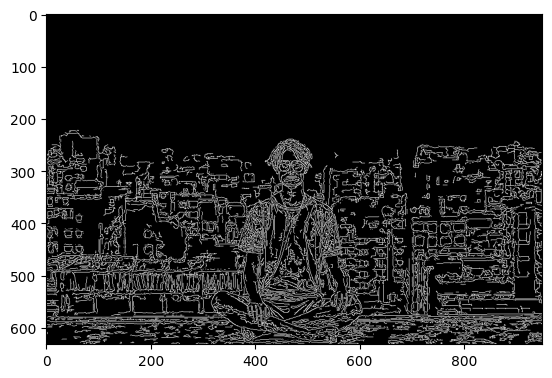

In [34]:
image = cv2.imread("/home/vitalii/source/computer_vision/lenna.png", 0)
edges = cv2.Canny(image, 50, 100)
plt.imshow(edges, cmap="gray")

In [14]:
cv2.namedWindow("sample")
cv2.imshow("sample", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Countours
##### Countour with max area 


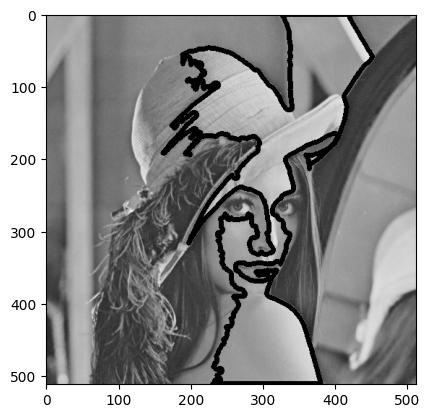

In [15]:
image = cv2.imread("/home/vitalii/source/computer_vision/lenna.png")
image_2 = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_2[200:300, :, 1] = image_2[200:300, :, 1] * 1.15
image_2 = cv2.cvtColor(image_2, cv2.COLOR_HSV2BGR)

image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)
image_2 = cv2.equalizeHist(image_2)
_, image_2 = cv2.threshold(image_2, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
kernel = np.ones((5, 5), np.uint8)
image_2 = cv2.erode(image_2, kernel)

image = cv2.imread("/home/vitalii/source/computer_vision/lenna.png", 0)

contours, _ = cv2.findContours(image_2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(c) for c in contours]
max_index = np.argmax(areas)
cv2.drawContours(image, contours, max_index, (0, 0, 255), 5)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

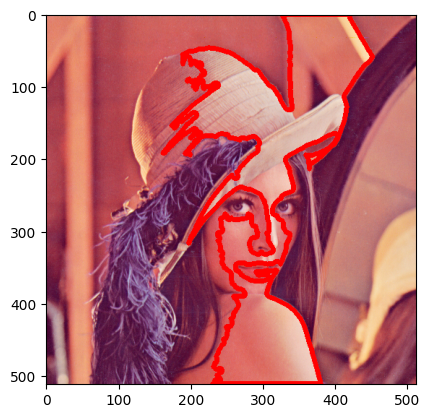

In [16]:
image = cv2.imread("/home/vitalii/source/computer_vision/lenna.png")
image_2 = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_2[200:300, :, 1] = image_2[200:300, :, 1] * 1.15
image_2 = cv2.cvtColor(image_2, cv2.COLOR_HSV2BGR)

image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)
image_2 = cv2.equalizeHist(image_2)
_, image_2 = cv2.threshold(image_2, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
kernel = np.ones((5, 5), np.uint8)
image_2 = cv2.erode(image_2, kernel)

contours, _ = cv2.findContours(image_2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(c) for c in contours]
max_index = np.argmax(areas)
cv2.drawContours(image, contours, max_index, (0, 0, 255), 5)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

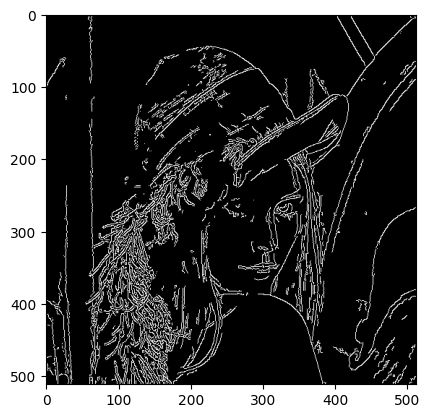

In [32]:
image = cv2.imread("/home/vitalii/source/computer_vision/lenna.png", 0)
image_2 = cv2.Canny(image, 50, 100)

contours, _ = cv2.findContours(image_2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(c) for c in contours]
max_index = np.argmax(areas)
cv2.drawContours(image_2, contours, max_index, (0, 0, 255), 5)
plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))

### Fourier transform

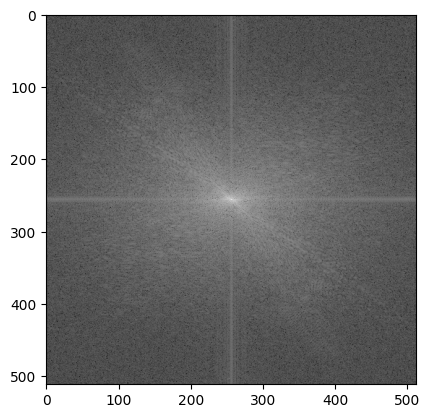

In [17]:
image = cv2.imread("/home/vitalii/source/computer_vision/lenna.png", 0)
f1 = np.fft.fft2(image)  # Fust Fourier transform (центр координат 0 0)
f2 = np.fft.fftshift(f1)  # Смещаем центр координат

spectrum = np.log((np.abs(f2)))  # Попробовать дважды логарифмировать?

dst = np.array(spectrum, dtype = np.float32)
image_dst = cv2.normalize(dst, None, 0, 1, cv2.NORM_MINMAX)
plt.imshow(image_dst, cmap="gray")

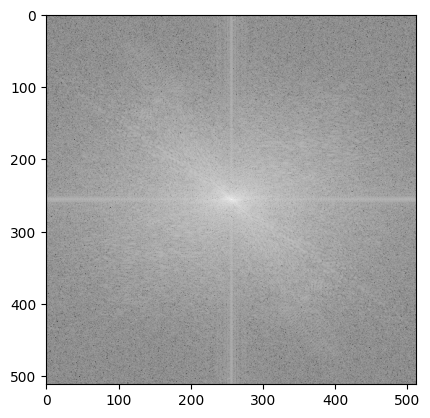

In [18]:
image = cv2.imread("/home/vitalii/source/computer_vision/lenna.png", 0)
f1 = np.fft.fft2(image)  # Fust Fourier transform (центр координат 0 0)
f2 = np.fft.fftshift(f1)  # Смещаем центр координат

spectrum = np.log(np.log((np.abs(f2))))  # Попробовать дважды логарифмировать?

dst = np.array(spectrum, dtype = np.float32)
image_dst = cv2.normalize(dst, None, 0, 1, cv2.NORM_MINMAX)
plt.imshow(image_dst, cmap="gray")

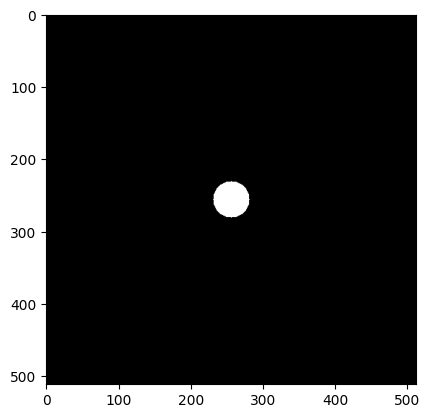

In [19]:
# Хотим обнулить высокие частоты

mask = np.zeros(f1.shape, np.uint8)
mask = np.array(mask, dtype = np.uint8)

k = 0.05
w, h = image.shape
cv2.circle(mask, ((int)(w / 2), (int)(h / 2)), (int)(w * k), (255, 255, 255), -1)  # Примитив circle
plt.imshow(mask, cmap="gray")

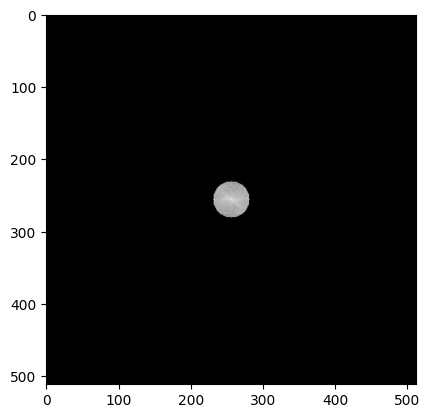

In [20]:
f2[mask == 0] = 0
spectrum = np.log(np.abs(0.1 + f2))

dst = np.array(spectrum, dtype=np.float32)
image_dst = cv2.normalize(dst, None, 0, 1, cv2.NORM_MINMAX)
plt.imshow(image_dst, cmap="gray")

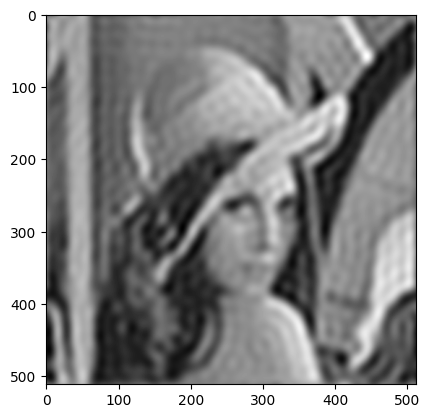

In [21]:
# Обратное преобразование Фурье

conv_image = np.fft.ifft2(np.fft.ifftshift(f2)).real
image_dst = np.array(conv_image, dtype = np.uint8)
plt.imshow(image_dst, cmap="gray")

### Video

In [23]:
capture = cv2.VideoCapture("/home/vitalii/source/computer_vision/earth.avi")
_, prev_image = capture.read()
prev_image = cv2.cvtColor(prev_image, cv2.COLOR_BGR2GRAY)
while True:
    _, image = capture.read()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imshow("earth", image)

    points = cv2.goodFeaturesToTrack(image, 1000, 0.01, 10)
    points_2, st, err = cv2.calcOpticalFlowPyrLK(image, prev_image, points, None, winSize=(20, 20))

    points = np.int0(points)
    points_2 = np.int0(points_2)

    prev_image = image
    for i, p in enumerate(points):
        x1, y1 = p.ravel()
        x2, y2 = points_2[i].ravel()
        cv2.circle(image, (x1, y1), 2, 255)
        cv2.line(image, (x1, y1), (x2, y2), 255, 1)

    cv2.imshow("result", image)

    if cv2.waitKey(10) == 32:
        break

/tmp/ipykernel_41998/675230835.py:12: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points = np.int0(points)
/tmp/ipykernel_41998/675230835.py:13: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  points_2 = np.int0(points_2)


error: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
